# <font color="blue"> Data challenge practice: [Breast Cancer Wisconsin (Original) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29) </font>

In [5]:
from pandas import DataFrame, Series
import pandas as pd
import scipy as sp
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

# 1. Data munging
## 1.1 Load data and assign column names

In [113]:
# 1. Sample code number: id number 
# 2. Clump Thickness: 1 - 10 
# 3. Uniformity of Cell Size: 1 - 10 
# 4. Uniformity of Cell Shape: 1 - 10 
# 5. Marginal Adhesion: 1 - 10 
# 6. Single Epithelial Cell Size: 1 - 10 
# 7. Bare Nuclei: 1 - 10 
# 8. Bland Chromatin: 1 - 10 
# 9. Normal Nucleoli: 1 - 10 
# 10. Mitoses: 1 - 10 
# 11. Class: (2 for benign, 4 for malignant)
names = ['id','thick','size_','shape_','adhesion','size_1','nuc','chromatin','nucleo','mito','class_']
df = pd.read_csv('breast-cancer-wisconsin.data',names=names)
df.head()

,id,thick,size_,shape_,adhesion,size_1,nuc,chromatin,nucleo,mito,class_
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 1.2. Check for missing data

In [114]:
pd.isnull(df).sum()

id           0
thick        0
size_        0
shape_       0
adhesion     0
size_1       0
nuc          0
chromatin    0
nucleo       0
mito         0
class_       0
dtype: int64

## 1.3. Clean data

In [138]:
# Is id unique across all rows?
print len(df)-len(df.id.unique())

54


In [140]:
# find duplicate rows (in terms of id) and remove them (for convenience)
df = df[df.duplicated(subset='id')==False]

In [141]:
df.describe()

,id,thick,size_,shape_,adhesion,size_1,chromatin,nucleo,mito,class_
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1074418.654264,4.471318,3.182946,3.269767,2.893023,3.275969,3.497674,2.955039,1.613953,2.719380
std,637262.659601,2.858115,3.059049,2.985748,2.918036,2.247455,2.459374,3.120682,1.744056,0.960564
min,61634.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,871549.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1171795.000000,4.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1238186.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,13454352.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**Problem - 'nuc' column is missing**: check the values of the column

In [142]:
df.nuc.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object)

- There's ? in nuc column. How many rows have '?' ?
- Also these are strings.

In [143]:
sum(df.nuc=='?')

16

Not too many. I am going to **remove the rows** from the data.

In [146]:
df_ = df[df.nuc != '?']
# check if ? is really gone
print df_.nuc.unique()
# check how many rows we have now
print len(df_)

['1' '10' '2' '4' '3' '9' '7' '5' '8' '6']
629


In [147]:
# convert strings to integers
a = df_.nuc.apply((lambda x: int(x)))
df_.nuc = a

In [148]:
df_.describe()

,id,thick,size_,shape_,adhesion,size_1,nuc,chromatin,nucleo,mito,class_
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,1079934.470588,4.499205,3.201908,3.279809,2.920509,3.297297,3.624801,3.507154,2.960254,1.629571,2.731320
std,641470.828066,2.864023,3.073763,3.003913,2.928562,2.257121,3.670647,2.471886,3.121225,1.763343,0.963996
min,63375.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,877943.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1172152.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1238633.000000,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000,4.000000
max,13454352.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# 2. Exploratory Data Analysis
## 2.1. Distribution 
### 2.1.1. box plot

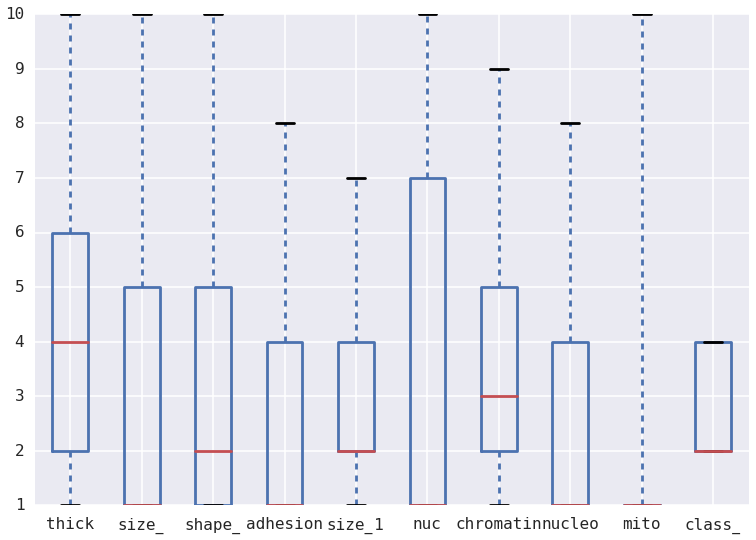

In [149]:
df_.ix[:,1:].plot(kind='box')

- Need to check 'Mito' column.

mito column has 514 0's


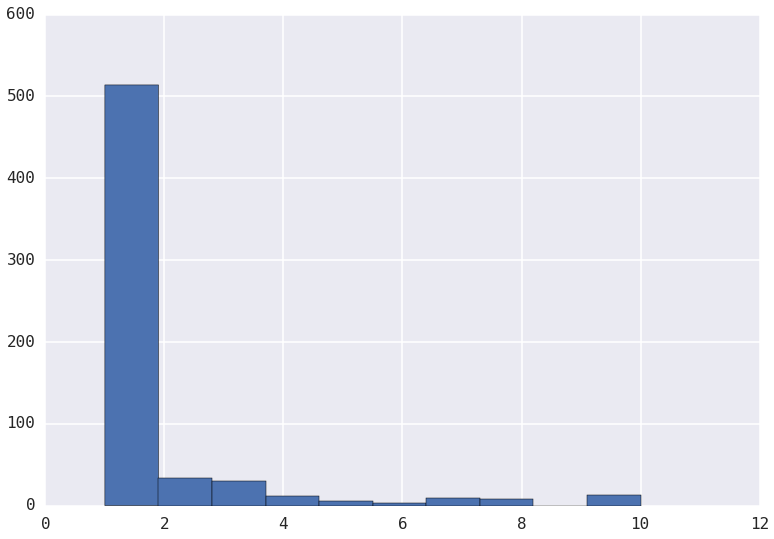

In [150]:
df_.mito.hist()
print 'mito column has ' + str(sum(df_.mito==min(df.mito))) + " 0's"

- Is this a good feature?

### 2.1.2. Multivariate features

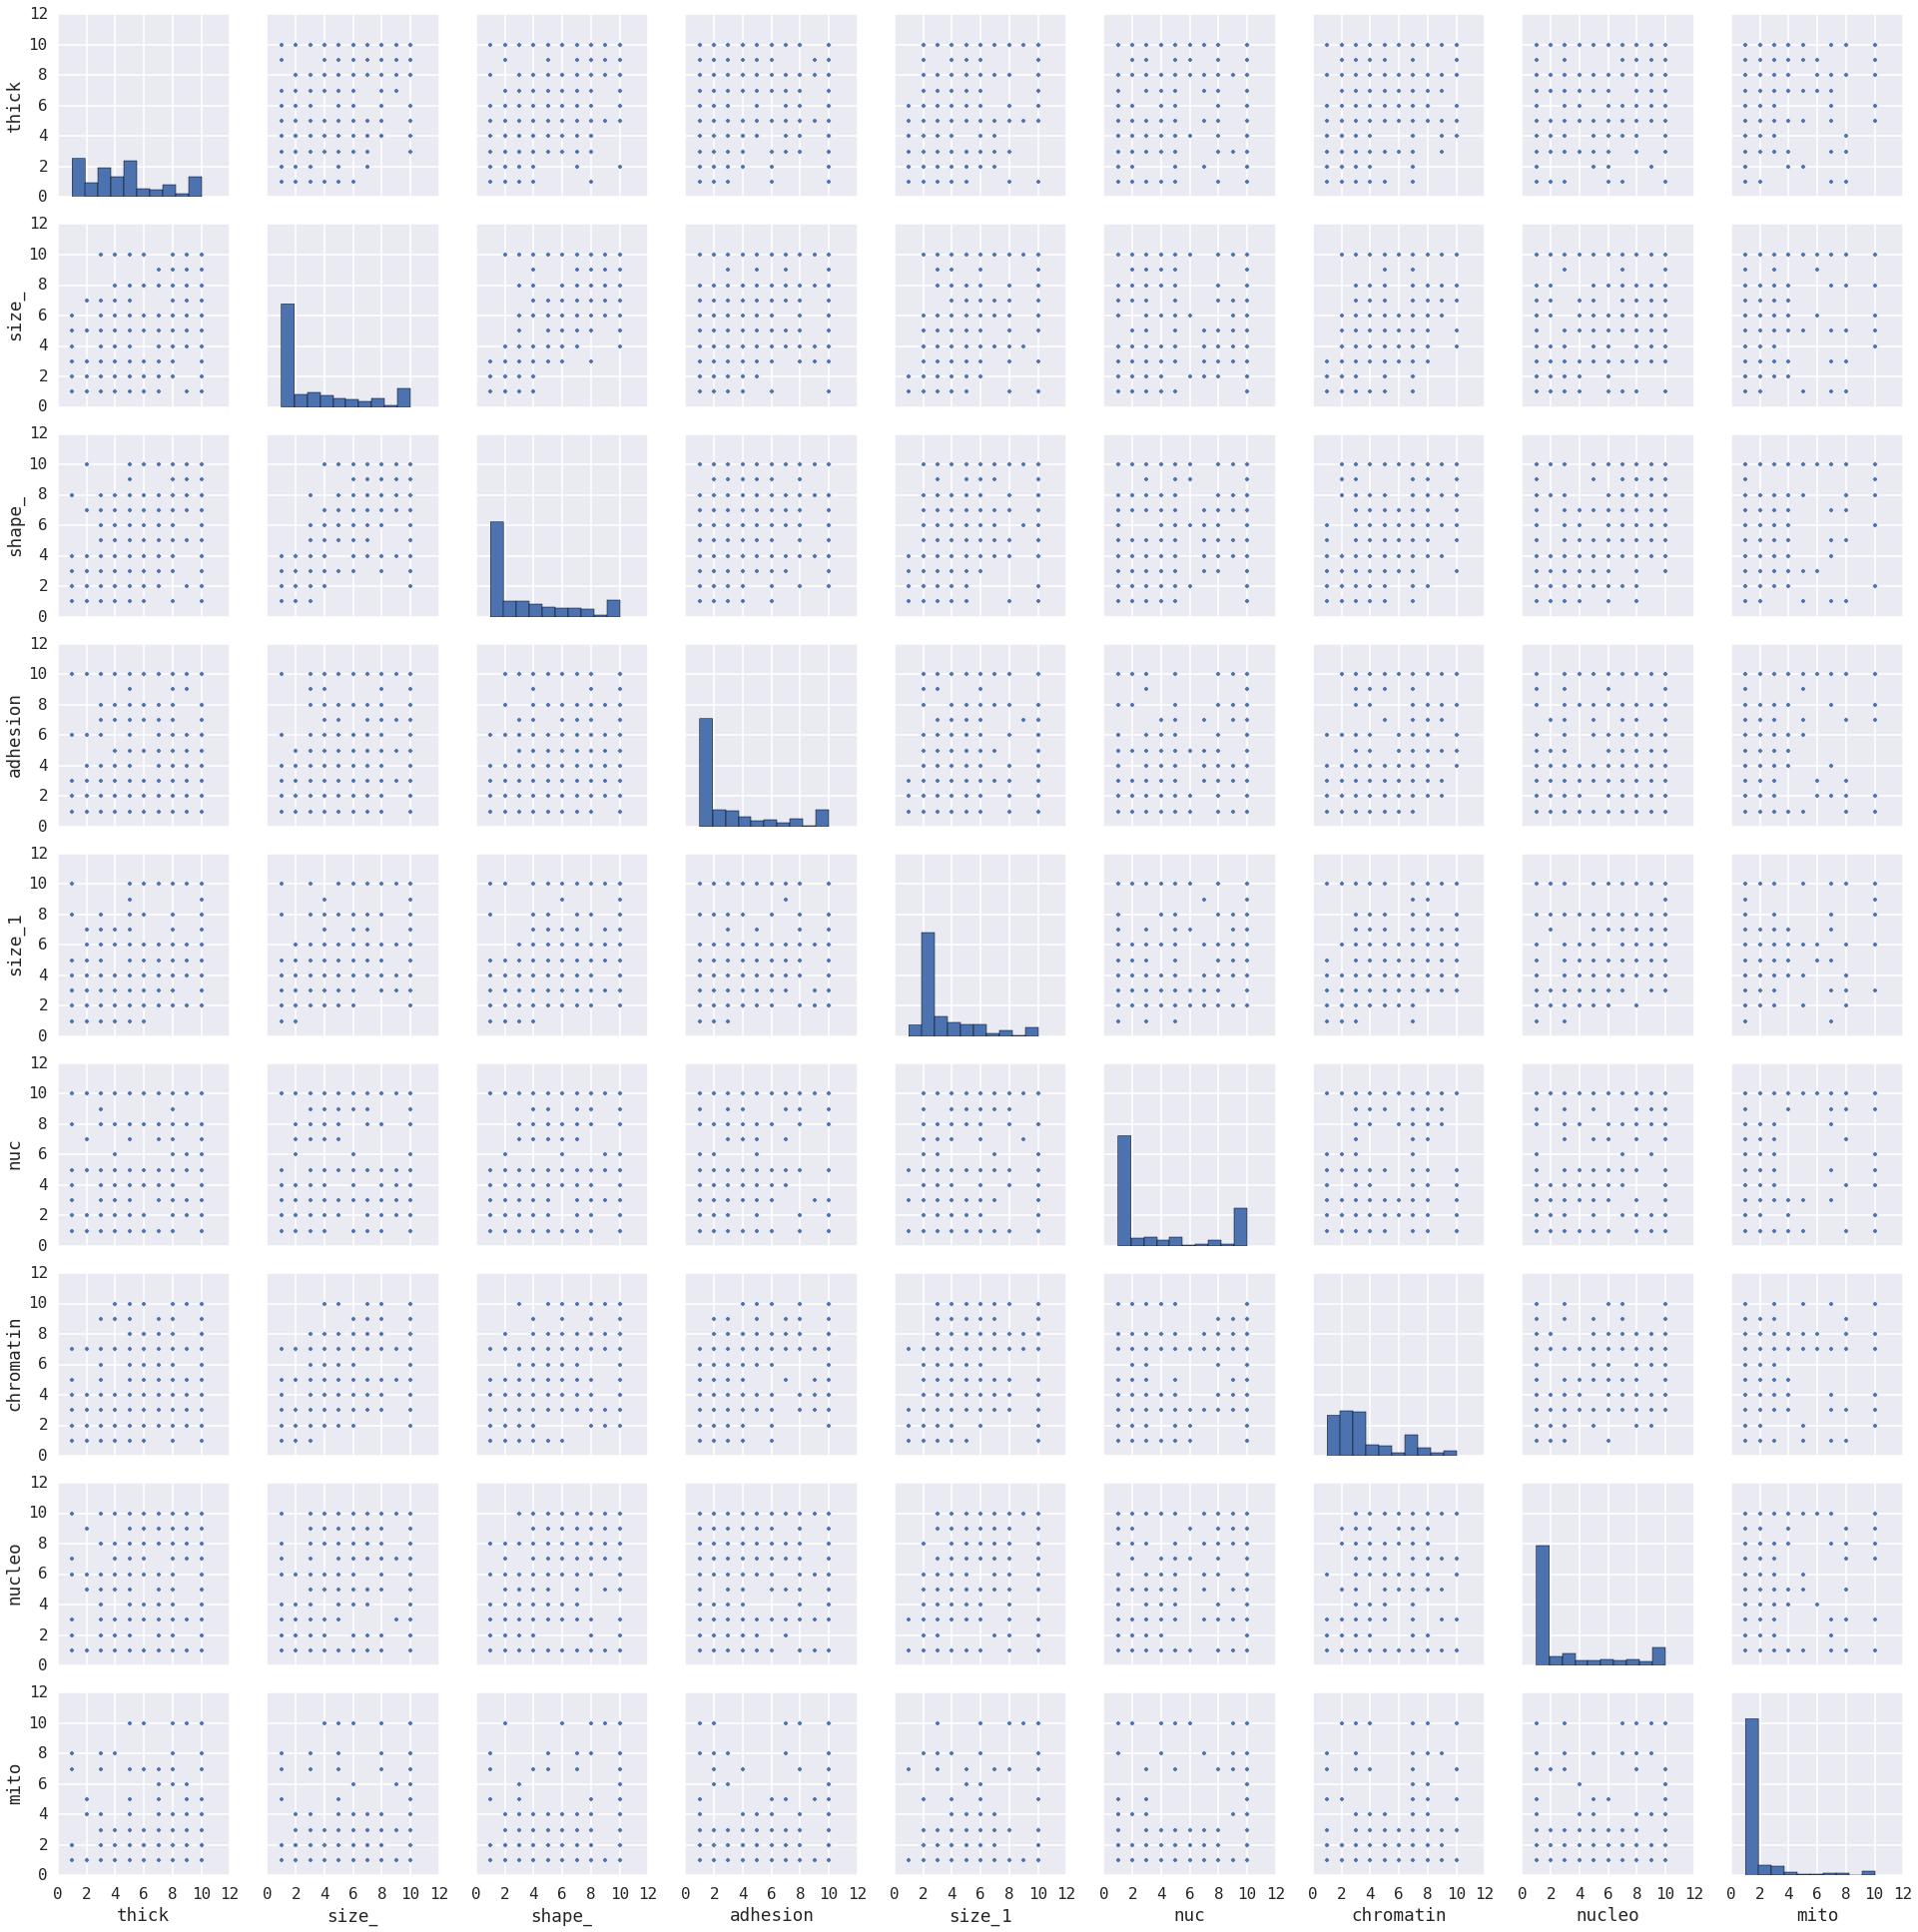

In [154]:
# pairplot: not relaly informative
sns.pairplot(df_.ix[:,1:-1])

In [129]:
"""histograms in one plot (looks messy)"""
# f, ax = plt.subplots(figsize=(11, 6))
# df_test = df.ix[:,1:-1]
# bins = np.linspace(0, 10, 10)
# for column in df_test.columns:
#     plt.hist(df_test[column], bins, alpha=0.5)
# plt.show()

## 2.2 Features correlation

In [155]:
# Correlation matrix
corrmat = df_.ix[:,1:-1].corr()
corrmat

,thick,size_,shape_,adhesion,size_1,nuc,chromatin,nucleo,mito
thick,1.000000,0.642056,0.654680,0.486197,0.516704,0.591606,0.556181,0.532874,0.346932
size_,0.642056,1.000000,0.904103,0.712904,0.750806,0.681621,0.760885,0.724492,0.459203
shape_,0.654680,0.904103,1.000000,0.688735,0.714820,0.705758,0.734433,0.720780,0.437159
adhesion,0.486197,0.712904,0.688735,1.000000,0.595465,0.672250,0.667239,0.593345,0.404708
size_1,0.516704,0.750806,0.714820,0.595465,1.000000,0.577194,0.619369,0.629131,0.481807
nuc,0.591606,0.681621,0.705758,0.672250,0.577194,1.000000,0.678592,0.576185,0.326604
chromatin,0.556181,0.760885,0.734433,0.667239,0.619369,0.678592,1.000000,0.663062,0.330312
nucleo,0.532874,0.724492,0.720780,0.593345,0.629131,0.576185,0.663062,1.000000,0.419438
mito,0.346932,0.459203,0.437159,0.404708,0.481807,0.326604,0.330312,0.419438,1.000000


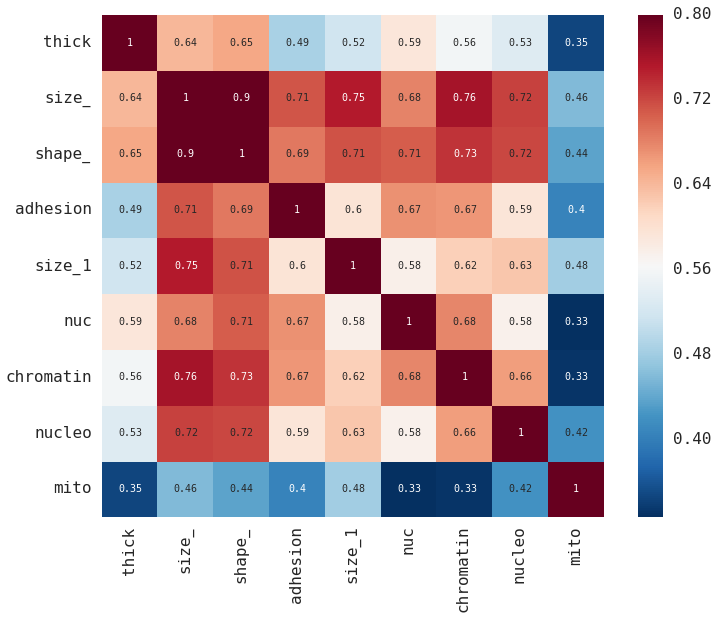

In [156]:
f, ax = plt.subplots(figsize=(12, 9))
sns.set(context="poster", font="monospace")
sns.heatmap(corrmat, vmax=.8, linewidths=0, square=True, annot=True, cmap='RdBu_r')
# sns.heatmap(corrmat, vmax=.8, linewidths=0.5, square=True)

## 2.3 Data balance (classification)

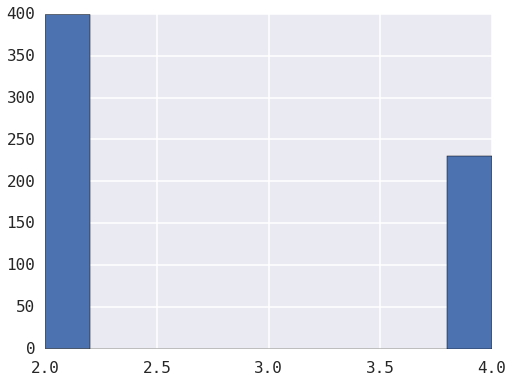

In [164]:
plt.subplots(figsize=(8, 6))
df_.class_.hist()

- Not to severe, but it's not balanced.
- If necessary, we can even run a statistical test to see if they are significantly different from 1:1.
- In random forest, you can set class_weight variable as auto to consider this.

# 3. Models
I decided to use **random forest**:
- [One of the best classifiers](http://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf)
- Unbalanced data
- Feature imporatance

## 3.1 Model fitting and cross validation

In [159]:
X = df_.ix[:,1:-1]
X.head()

,thick,size_,shape_,adhesion,size_1,nuc,chromatin,nucleo,mito
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [165]:
# Splitting data into train and test
X = df_.ix[:,1:-1]
y = df_.class_
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [169]:
# random forest
from sklearn.ensemble import RandomForestClassifier
# class_weight considers unbalanced data
clf = RandomForestClassifier(max_depth=5, n_estimators=50, max_features='auto', class_weight='auto') 
clf.fit(np.array(X_train), np.array(y_train))
score = clf.score(np.array(X_test), np.array(y_test))
print score

0.97619047619


## 3.2 Feature importance

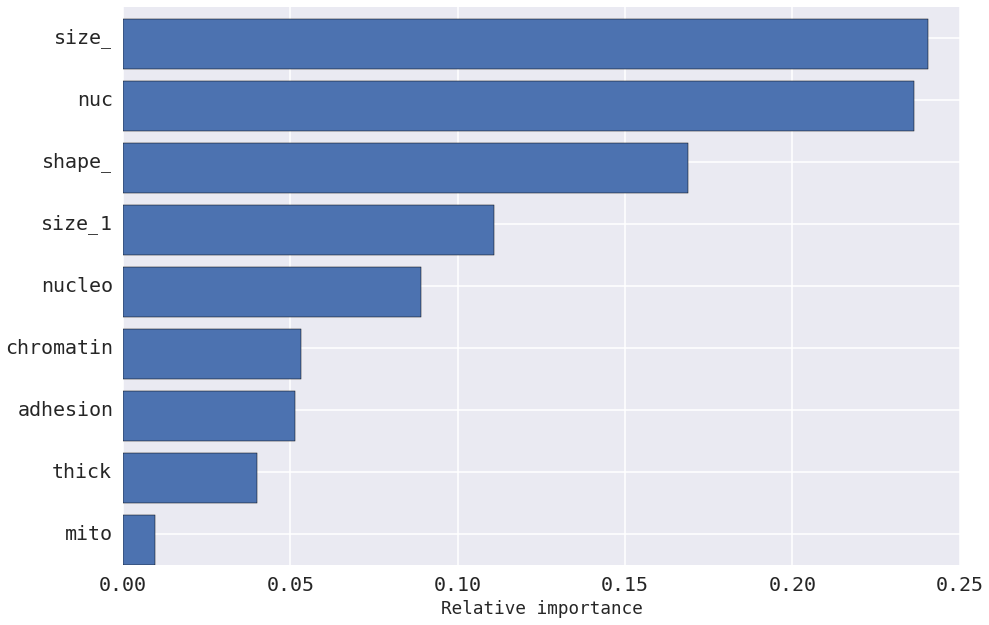

In [173]:
# feature importance
feature_names = X.columns.values
fig = plt.figure(figsize=(15,10))
# sort importances
indices = np.argsort(clf.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(feature_names)), clf.feature_importances_[indices])
plt.yticks(np.arange(len(feature_names)) + 0.5, np.array(feature_names)[indices])
_ = plt.xlabel('Relative importance')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

## 3.3 Feature selection and model performance
- Plot accuracy score against subset of features

In [189]:
# feature column index (desc order) based on feature importance
feature_import_order = indices[::-1]
print feature_import_order

[1 5 2 4 7 6 3 0 8]


In [188]:
def run_rf(feature_ind_list):
    """Run RF based on subset of features and return accuracy score"""
    # cross validation
    X = df_.ix[:,feature_ind_list]
    y = df_.class_
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
    # random forest
    clf = RandomForestClassifier(max_depth=5, n_estimators=50, max_features='auto', class_weight='auto') 
    clf.fit(np.array(X_train), np.array(y_train))
    score = clf.score(np.array(X_test), np.array(y_test))
    print score
    return score

In [195]:
scores = []
for i in range(1,len(feature_import_order)+1):
    feature_ind_list = feature_import_order[0:i]
    score = run_rf(feature_ind_list)
    scores.append(score)

0.781746031746
0.93253968254
0.952380952381
0.964285714286
0.956349206349
0.980158730159
0.984126984127
0.984126984127
0.984126984127


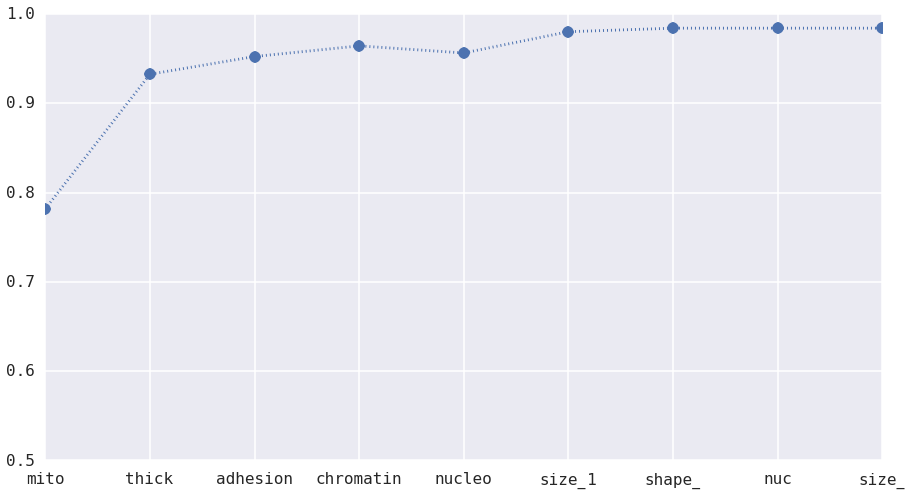

In [225]:
plt.figure(figsize=(15,8))
plt.plot(scores,':o')
plt.xticks(range(len(feature_names)),np.array(feature_names)[indices])
plt.ylim([0.5,1])
plt.show()

In [228]:
scores = []
for i in range(1,len(feature_import_order)+1):
    feature_ind_list = feature_import_order[::-1][0:i]
    score = run_rf(feature_ind_list)
    scores.append(score)

0.892857142857
0.873015873016
0.940476190476
0.97619047619
0.97619047619
0.968253968254
0.97619047619
0.984126984127
0.984126984127


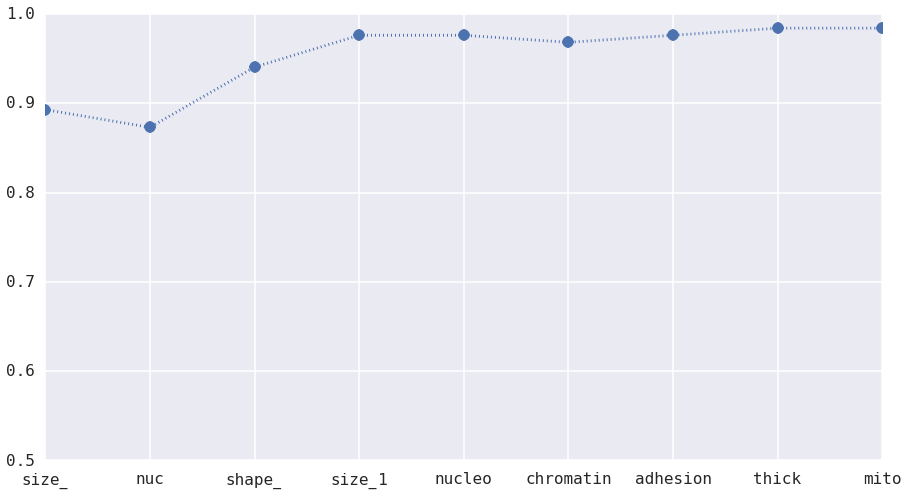

In [238]:
plt.figure(figsize=(15,8))
plt.plot(scores,':o')
plt.xticks(range(len(feature_names)),np.array(feature_names)[indices][::-1])
plt.ylim([0.5,1])
plt.show()